## Table of contents

1. Motivation
2. Overview and data loading
3. Visualization
4. Missing values and outliers
5. Splitting of the dataset
6. Linear Regression
7. Random Forest Regressor
8. Support Vector Regression
9. Comparison of the results
10. Deployment of the model

## 1. Motivation

Goal: to predict the energy requirement to perform a milling process.


1. Creation of transparency and implementation of energy planning
2. Adaptation and optimization of the process parameters according to the energy requirement
3. Possibility of load management
4. Detection of deviations due to the comparison of the prediction and the actual energy profile


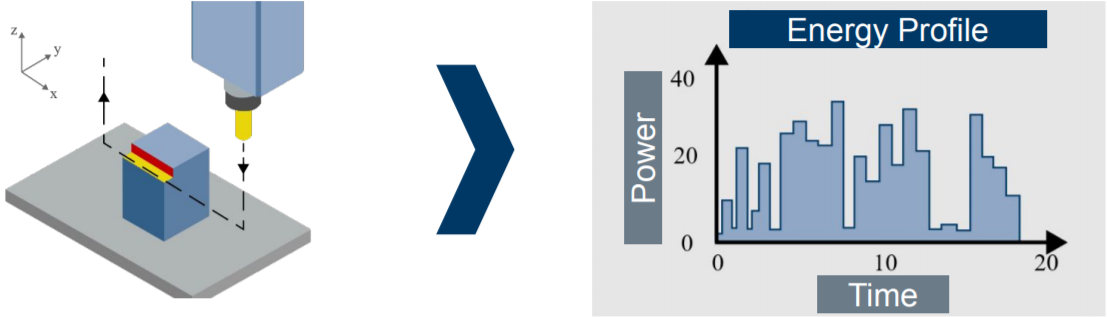

<div>
<img src="attachment:ML6.png" width="800"/>
</div>

Based on the planned process parameters, the energy required for the milling process is to be forecasted. As a basis for the development of a regression model, tests were carried out on a milling machine to gain sufficient data for the training.

#### 1.2 Structure of a milling machine

Using the Cartesian coordinate system, a machine can be controlled along each axis. Based on each axis, you typically get the following movements from the perspective of an operator facing the machine:
- X axis allows movement “left” and “right”
- Y axis allows movement “forward” and “backward”
- Z axis allows movement “up” and “down”

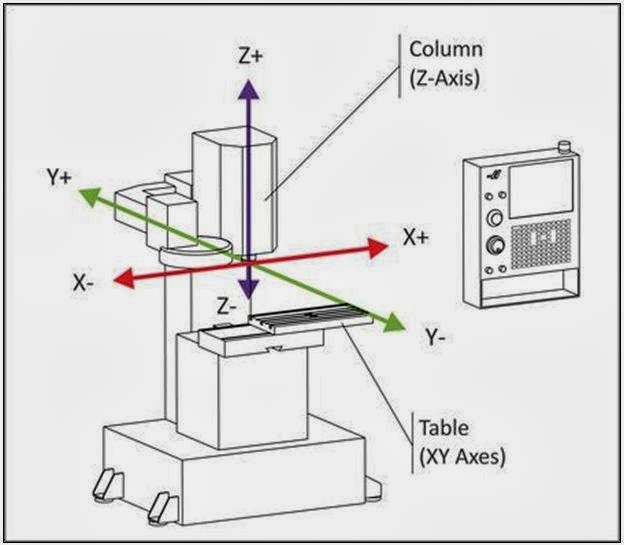


<div>
<img src="attachment:ML5.JPG" width="400"/>
</div>
Based on these movements, the right tool and other process parameters (feed, etc.) we can perform the required milling process.

## 2. Data loading and first overview

* The given data is stored in a text file containing the following columns,

  * Axis
  * Feed [mm/min]
  * Path [mm]
  * Energy requirement - Target variable [kJ]

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# setting white grid background
sns.set_style('whitegrid')
#%matplotlib notebook
%matplotlib inline

In [2]:
# specification of the path to the input data
df = pd.read_csv(r'dataset_energy_measurement.txt')

In [3]:
# statistical analysis of the dataset
df.describe()

,Axis,Feed,Path,Energy_Requirement
count,224.000000,225.000000,225.000000,226.000000
mean,2.093750,1759.200000,1.644444,0.060063
std,1.447173,887.559998,43.726604,0.163246
min,-5.000000,20.000000,-200.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012769
50%,2.000000,2000.000000,10.000000,0.038630
75%,3.000000,2500.000000,40.000000,0.063981
max,15.000000,3000.000000,150.000000,0.900000


In [4]:
df.head()

,Axis,Feed,Path,Energy_Requirement
0,-1.0,20.0,120.0,0.600000
1,-5.0,100.0,150.0,0.700000
2,10.0,150.0,130.0,0.800000
3,15.0,50.0,-200.0,0.900000
4,1.0,500.0,10.0,0.009795


## 3. Visualization 

Text(0, 0.5, 'Total quantity')

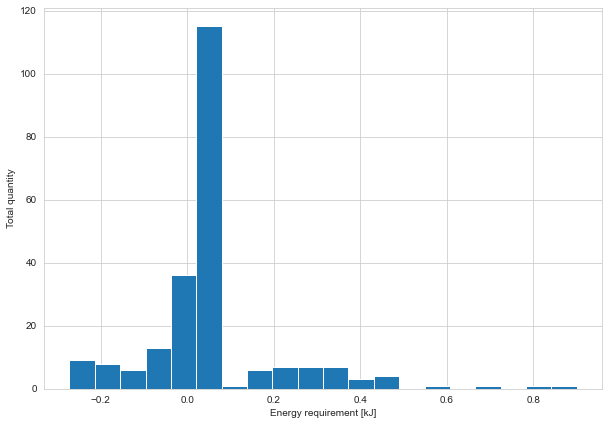

In [5]:
# plotting "Energy requirement"
%matplotlib inline
plt.figure(figsize=(10,7))
plt.hist(df.Energy_Requirement,bins=20, range = (df.Energy_Requirement.min(), df.Energy_Requirement.max()))
plt.xlabel('Energy requirement [kJ]')
plt.ylabel('Total quantity')

Text(0, 0.5, 'Total quantity')

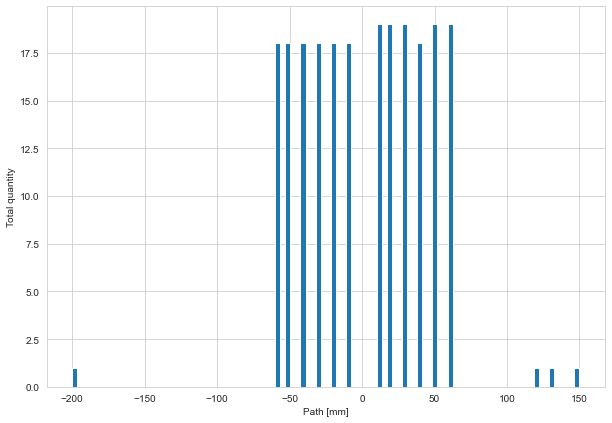

In [6]:
# plotting the attribute "Path"
%matplotlib inline
plt.figure(figsize=(10,7))
plt.hist(df.Path,bins = 100, range = (df.Path.min(), df.Path.max()))
plt.xlabel('Path [mm]')
plt.ylabel('Total quantity')

Text(0, 0.5, 'Total quantity')

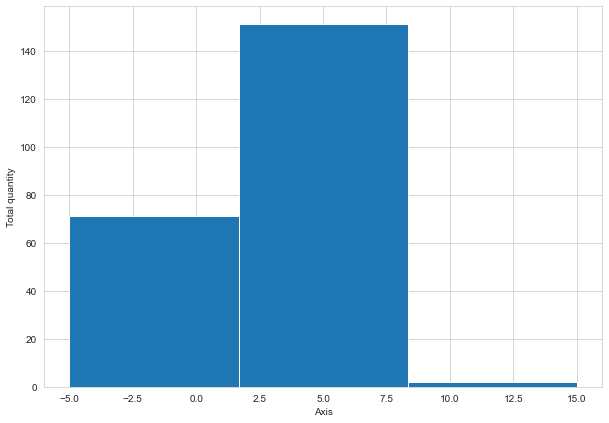

In [7]:
# plotting the attribute "Axis"
%matplotlib inline
plt.figure(figsize=(10,7))
plt.hist(df.Axis,bins =3, range = (df.Axis.min(), df.Axis.max()))
plt.xlabel('Axis')
plt.ylabel('Total quantity')

Text(0, 0.5, 'Total quantity')

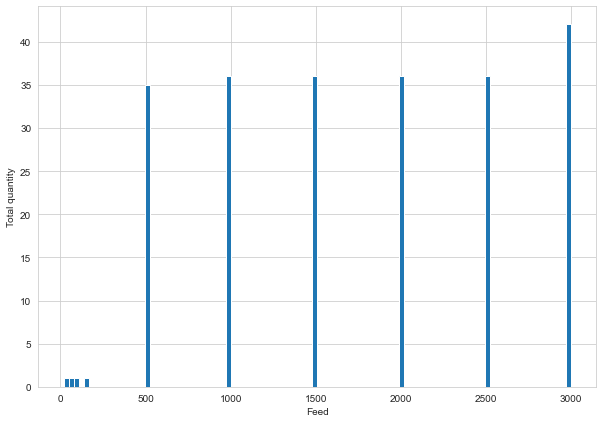

In [8]:
# plotting the attribue "Feed"
plt.figure(figsize=(10,7))
plt.hist(df.Feed,bins = 100, range = (df.Feed.min(), df.Feed.max()))
plt.xlabel('Feed')
plt.ylabel('Total quantity')

## 4. Missing values and outliers

In [9]:
df.head(10)

,Axis,Feed,Path,Energy_Requirement
0,-1.0,20.0,120.0,0.600000
1,-5.0,100.0,150.0,0.700000
2,10.0,150.0,130.0,0.800000
3,15.0,50.0,-200.0,0.900000
4,1.0,500.0,10.0,0.009795
5,6.0,NaN,20.0,0.019462
6,NaN,500.0,30.0,0.029309
7,-2.0,500.0,NaN,0.038570
8,NaN,500.0,50.0,0.048310
9,1.0,500.0,60.0,0.057808


In [10]:
df = df.dropna()
df.head(10)

,Axis,Feed,Path,Energy_Requirement
0,-1.0,20.0,120.0,0.600000
1,-5.0,100.0,150.0,0.700000
2,10.0,150.0,130.0,0.800000
3,15.0,50.0,-200.0,0.900000
4,1.0,500.0,10.0,0.009795
9,1.0,500.0,60.0,0.057808
10,1.0,1000.0,10.0,0.010401
11,1.0,1000.0,20.0,0.020560
12,1.0,1000.0,30.0,0.030982
13,1.0,1000.0,40.0,0.041358


In [11]:
# ouliers by analizing our data set
df.describe()

,Axis,Feed,Path,Energy_Requirement
count,222.000000,222.000000,222.000000,222.000000
mean,2.094595,1776.216216,1.216216,0.060535
std,1.402992,881.272788,43.841117,0.164672
min,-5.000000,20.000000,-200.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012699
50%,2.000000,2000.000000,10.000000,0.039071
75%,3.000000,2500.000000,40.000000,0.065277
max,15.000000,3000.000000,150.000000,0.900000


In [12]:
df = df.loc[(df.Axis >= 1) & (df.Axis <= 3) & 
            (df.Path >= -60) & (df.Path <= 60) & 
            (df.Feed >= 500) & (df.Feed <= 3000)]

In [13]:
df.describe()

,Axis,Feed,Path,Energy_Requirement
count,218.000000,218.000000,218.000000,218.000000
mean,2.045872,1807.339450,0.321101,0.047884
std,0.818961,858.431366,39.072043,0.135879
min,1.000000,500.000000,-60.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012676
50%,2.000000,2000.000000,10.000000,0.038600
75%,3.000000,2500.000000,37.500000,0.061995
max,3.000000,3000.000000,60.000000,0.450567


## 5. Splitting of the data set

In [14]:
X_multi = df.drop('Energy_Requirement', 1)
Y_target = df.Energy_Requirement

/var/folders/9t/xjvs2mls6qz3c8f0sx16_3x00000gp/T/ipykernel_61625/404737654.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_multi = df.drop('Energy_Requirement', 1)


In [15]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, Y_target, random_state=42)

In [16]:
# Checking the shapes of the datasets so that we dont wrongly fit the data
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(163, 3) (163,) (55, 3) (55,)


## 6. Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lreg = LinearRegression()

lreg.fit(X_train, Y_train)

LinearRegression()

In [19]:
pred_train = lreg.predict(X_train) # prediction of the training data
pred_test = lreg.predict(X_test) # prediction of unseen data

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Training data
MSE_linear_Train_Data = mean_squared_error(Y_train, pred_train)
MAE_linear_Train_Data = mean_absolute_error(Y_train, pred_train)

print("The Mean Square Error on the training data is:", MSE_linear_Train_Data)
print("The Mean Absolute Error on the training data is:", MAE_linear_Train_Data)


# Test data / unseen data
MSE_linear_Test_Data = mean_squared_error(Y_test, pred_test)
MAE_linear_Test_Data = mean_absolute_error(Y_test, pred_test)

print("The Mean Square Error on the test data is:", MSE_linear_Test_Data)
print("The Mean Absolute Error on the test data is:", MAE_linear_Test_Data)

The Mean Square Error on the training data is: 0.01167892485881179
The Mean Absolute Error on the training data is: 0.09121547964727234
The Mean Square Error on the test data is: 0.013044389500115312
The Mean Absolute Error on the test data is: 0.0905114994661013


Text(0, 0.5, 'Residual Value')

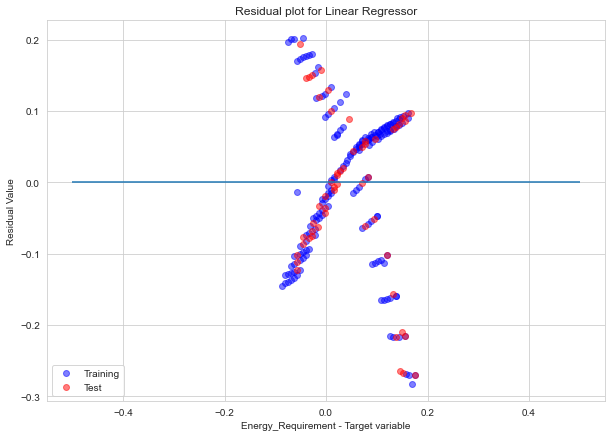

In [21]:
# Data points to be scattered around the horizontal line
%matplotlib inline
plt.figure(figsize=(10,7))
train = plt.scatter(pred_train, (pred_train-Y_train), c='b', alpha=0.5)
test = plt.scatter(pred_test, (pred_test-Y_test), c='r', alpha=0.5)
plt.hlines(y=0, xmin=-0.5, xmax=0.5)
plt.legend((train, test), ('Training', 'Test'),loc='lower left')
plt.title('Residual plot for Linear Regressor')
plt.xlabel("Energy_Requirement - Target variable")
plt.ylabel("Residual Value")

## 7. Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
# 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [23]:
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [24]:
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Training data
MSE_rf_Train_Data = mean_squared_error(Y_train, rf_pred_train)
MAE_rf_Train_Data = mean_absolute_error(Y_train, rf_pred_train)

print("Mean Square Error on the training data is:", MSE_rf_Train_Data)
print("Mean Absolute Error on the training data is:", MAE_rf_Train_Data)

# Test data
MSE_rf_Test_Data = mean_squared_error(Y_test, rf_pred_test)
MAE_rf_Test_Data = mean_absolute_error(Y_test, rf_pred_test)

print("\n""Mean Square Error on the test data is:", MSE_rf_Test_Data)
print("Mean Absolute Error on the test data is:", MAE_rf_Test_Data)


Mean Square Error on the training data is: 6.31350011685033e-05
Mean Absolute Error on the training data is: 0.0026605765337424903

Mean Square Error on the test data is: 0.00017383678946808628
Mean Absolute Error on the test data is: 0.005907323690909195


Text(0, 0.5, 'Residual Value')

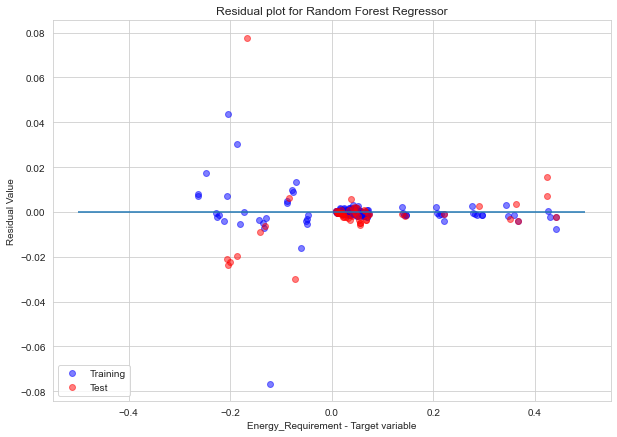

In [26]:
# Data points to be scattered around the horizontal line
%matplotlib inline
plt.figure(figsize=(10,7))
train = plt.scatter(rf_pred_train, (rf_pred_train-Y_train), c='b', alpha=0.5)
test = plt.scatter(rf_pred_test, (rf_pred_test-Y_test), c='r', alpha=0.5)
plt.hlines(y=0, xmin=-0.5, xmax=0.5)
plt.legend((train, test), ('Training', 'Test'),loc='lower left')

plt.title("Residual plot for Random Forest Regressor")
plt.xlabel("Energy_Requirement - Target variable")
plt.ylabel("Residual Value")

## 8. Support Vector Regression (SVR)

In [27]:
from sklearn.svm import SVR

In [28]:
svr = SVR()
svr.fit(X_train, Y_train)

SVR()

In [29]:
svr_pred_train = svr.predict(X_train)
svr_pred_test = svr.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Training data
MSE_svr_Train_Data = mean_squared_error(Y_train, svr_pred_train)
MAE_svr_Train_Data = mean_absolute_error(Y_train, svr_pred_train)

print("Mean Square Error on the training data is:", MSE_svr_Train_Data)
print("Mean Absolute Error on the training data is:", MAE_svr_Train_Data)

# Test data
MSE_svr_Test_Data = mean_squared_error(Y_test, svr_pred_test)
MAE_svr_Test_Data = mean_absolute_error(Y_test, svr_pred_test)

print("\n""Mean Square Error on the test data is:", MSE_svr_Test_Data)
print("Mean Absolute Error on the test data is:", MAE_svr_Test_Data)

Mean Square Error on the training data is: 0.013595253971989574
Mean Absolute Error on the training data is: 0.08173011271299446

Mean Square Error on the test data is: 0.01713173248228542
Mean Absolute Error on the test data is: 0.0928492482136748


Text(0, 0.5, 'Residual Value')

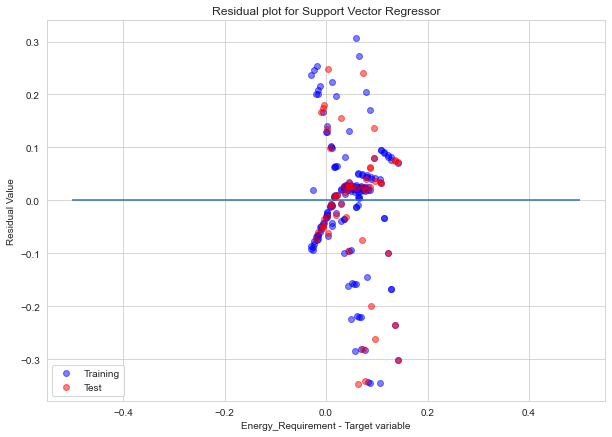

In [31]:
#  visualize the residual plot
%matplotlib inline
plt.figure(figsize=(10,7))
train = plt.scatter(svr_pred_train, (svr_pred_train-Y_train), c='b', alpha=0.5)
test = plt.scatter(svr_pred_test, (svr_pred_test-Y_test), c='r', alpha=0.5)
plt.hlines(y=0, xmin=-0.5, xmax=0.5)
plt.legend((train, test), ('Training', 'Test'),loc='lower left')
plt.title("Residual plot for Support Vector Regressor")
plt.xlabel("Energy_Requirement - Target variable")
plt.ylabel("Residual Value")

## 9. Comparison and results

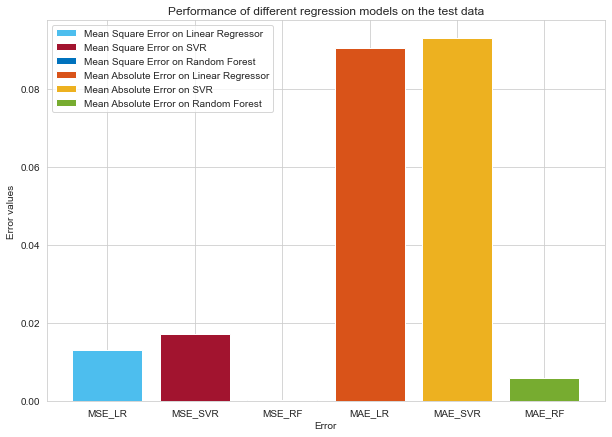

In [32]:
# visualisation of the results
%matplotlib inline 
plt.figure(figsize=(10,7))
plt.bar(['MSE_LR'],[MSE_linear_Test_Data], color=['#4DBEEE'], label="Mean Square Error on Linear Regressor")
plt.bar(['MSE_SVR'],[MSE_svr_Test_Data], color=['#A2142F'], label="Mean Square Error on SVR")
plt.bar(['MSE_RF'],[MSE_rf_Test_Data], color=['#0072BD'], label="Mean Square Error on Random Forest")

plt.bar(['MAE_LR'],[MAE_linear_Test_Data], color=['#D95319'], label="Mean Absolute Error on Linear Regressor")
plt.bar(['MAE_SVR'],[MAE_svr_Test_Data], color=['#EDB120'], label="Mean Absolute Error on SVR")
plt.bar(['MAE_RF'],[MAE_rf_Test_Data], color=['#77AC30'], label="Mean Absolute Error on Random Forest")

plt.xlabel('Error')
plt.ylabel('Error values')
plt.title('Performance of different regression models on the test data')
plt.legend(loc="upper left")
plt.show()

## 10. Deployment of the model

Example:

 1. Setting 1: axis = 2, feed = 800 [mm/min], distance = 60 [mm]
 2. Setting 2: axis = 3, feed = 2000 [mm/min], distance = 40 [mm]
 3. Setting 3: axis = 1, feed = 1200 [mm/min], distance = -20 [mm]

In [33]:
x1 = [[2, 800, 60]]
setting1 = rf.predict(x1)
print("Predicted Energy Requirement for setting 1 is", setting1, "kJ.")

x2 = [[3, 2000, 40]]
setting2 = rf.predict(x2)
print("Predicted Energy Requirement for setting 2 is", setting2, "kJ.")

x3 = [[1, 1200, -20]]
setting3 = rf.predict(x3)
print("Predicted Energy Requirement for setting 3 is", setting3, "kJ.")

sum = setting1[0] + setting2[0] + setting3[0]

print("Predicted Energy Requirement for all settings is", sum, "kJ.")

Predicted Energy Requirement for setting 1 is [0.05394835] kJ.
Predicted Energy Requirement for setting 2 is [0.28709159] kJ.
Predicted Energy Requirement for setting 3 is [0.02084422] kJ.
Predicted Energy Requirement for all settings is 0.3618841639999991 kJ.


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
